In [1]:
import os
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from ipywidgets import interactive
%matplotlib inline

In [2]:
datapath = os.path.join("..", "data", "crimes.zip")
columns = ["ID", "Date", "Block", "Primary Type", "Latitude", "Longitude", "District", "Ward", "Community Area"]
fulldata = pd.read_csv(datapath, usecols=columns)

In [3]:
fulldata["Date"] = pd.to_datetime(fulldata["Date"],
                                  format='%m/%d/%Y',
                                  exact=False)
fulldata = fulldata.set_index("Date")

If the mpl_toolkits is broken again try:
```bash
sudo apt-get install libgeos-3.5.0
sudo apt-get install libgeos-dev
pip3 install https://github.com/matplotlib/basemap/archive/master.zip --user
```

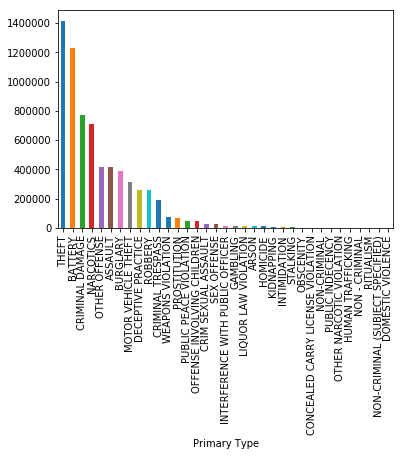

In [4]:
primary_type_counts = fulldata.groupby("Primary Type").ID.count().sort_values(ascending=False)
primary_type_counts.plot(kind="bar")

In [5]:
primary_types = ['TOTAL'] + primary_type_counts.index.tolist()

In [6]:
def crime_viewer(crime, year):
    crime_type = crime.lower().replace(" ", "_")
    png_title = "crime_" + crime_type + "_" + str(year) + ".png"
    plt.figure(figsize=(10, 5))
    img = mpimg.imread(os.path.join("maps", png_title))
    plt.imshow(img)

interactive(crime_viewer, crime = primary_types, year=(2001, 2017, 1))

interactive(children=(Dropdown(description='crime', options=('TOTAL', 'THEFT', 'BATTERY', 'CRIMINAL DAMAGE', '…